# **GAN and WGAN on Wine Dataset**

### **Creating GAN using custom NN and comparing its performance on different datasets**

---

### **What is a GAN?**
A GAN (Generative Adversarial Network) trains two neural networks:
1. **Generator**: Learns to create fake data that mimics real data.
2. **Discriminator**: Learns to distinguish between real and fake data.

Over time, the generator improves by "fooling" the discriminator, producing fake data that increasingly resembles the real data. Ideally, the generated data should overlap with the real data, as shown by overlapping points in the visualizations.

---

### **Hypothesis**
The longer the GAN is trained on the wine dataset, the generator should learn to generate realistic wine data that approximates the real data. Eventually, the generated and real data should overlap.

---

### **Who Did What?**
- **Rithwan**: Built the custom neural network (NN) and tested it on the "make_moons" dataset.
- **Kevin T**: Used the custom NN to code a GAN on the "blobs" dataset. However, the results were suboptimal, even after hyperparameter tuning.
- **Johan**: Improve the GAN and test it on a different dataset.
- **My Task**: Improve the GAN and test it on a different dataset.  

I decided to use the **Wine dataset**, which contains real-world chemical properties of wine, making it more complex than synthetic datasets like "make_blobs." This complexity helps evaluate whether the generator can create realistic high-dimensional data. I also upgraded the GAN to a **Wasserstein GAN (WGAN)** with a different loss function, weight clipping, and multiple discriminator updates.  

---

### **Approach**
1. **First GAN Attempt**:  
   - Used the GAN with custom NN created by Kevin T and Rithwan.  
   - Preprocessed the Wine dataset with StandardScaler for normalization and PCA to reduce dimensionality for visualization.  
   - **Results**: Similar to Kevin T. Generated data failed to overlap significantly with real data, even after tuning hyperparameters.

2. **WGAN Improvements**:  
   - Introduced Wasserstein loss for better gradient behavior.  
   - Added weight clipping to enforce the Lipschitz constraint.  
   - Updated the discriminator multiple times per generator step.  

---

### **Results**

1. **First GAN Implementation**:  
   The generator struggled to learn realistic wine data.  
   - The generated and real data showed no overlap, as seen in the PCA visualizations.  
   - The generator loss oscillated heavily, indicating instability.  
   - Discriminator loss saturated, showing that the discriminator overpowered the generator.  

2. **WGAN Implementation**:  
   Switching to WGAN improved stability and convergence.  
   - Weight clipping and multiple discriminator updates improved the generator's ability to approximate real data.  
   - While the generator improved over training epochs, it still did not achieve full overlap with the real data.  
   - The loss curves for both the generator and discriminator were smoother compared to the original GAN, indicating better training dynamics.  

3. **Overall**:  
 The WGAN demonstrated improved performance on the Wine dataset compared to the original GAN, but the hypothesis was only partially validated. The generated data improved in realism and partially overlapped with real data, but full overlap was not achieved.
 
 This project highlights the challenges of training GANs on complex, high-dimensional real-world datasets and the importance of selecting appropriate loss functions and architectural designs.

---

### **Conclusion**
The WGAN demonstrated improved performance on the Wine dataset compared to the GAN, but further enhancements are needed to achieve full overlap between generated and real data. This project highlights the challenges of training GANs on complex, high-dimensional real-world datasets and the importance of choosing appropriate loss functions and architectural designs.  


Epoch: 0, D loss: 2.3893, G loss: 0.3365


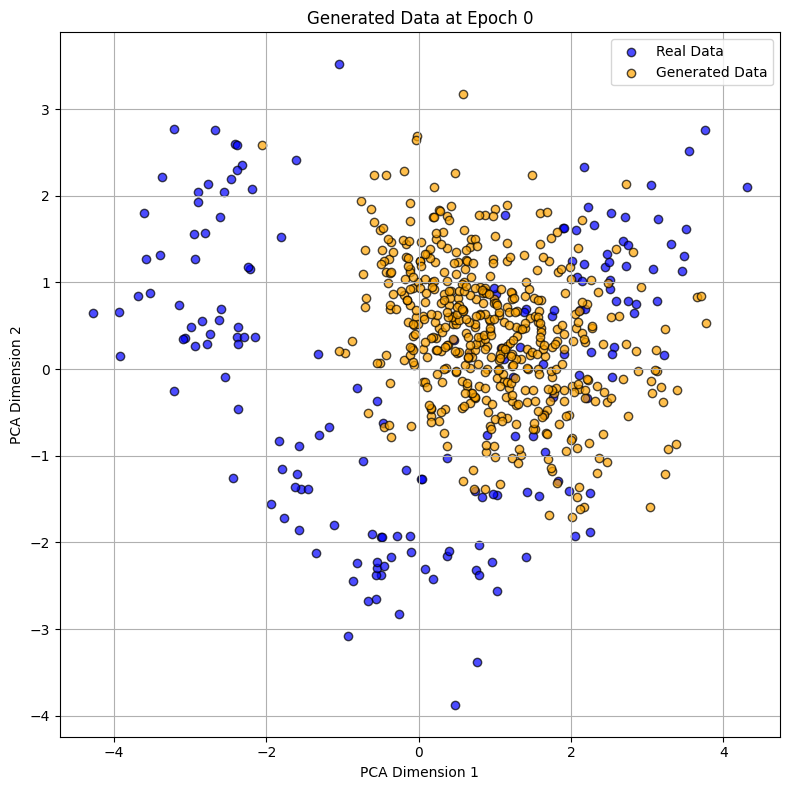

Epoch: 500, D loss: 1.0137, G loss: 1.1675
Epoch: 1000, D loss: 0.9069, G loss: 1.1140
Epoch: 1500, D loss: 0.8867, G loss: 1.1334
Epoch: 2000, D loss: 0.7893, G loss: 1.2663
Epoch: 2500, D loss: 0.7321, G loss: 1.3662


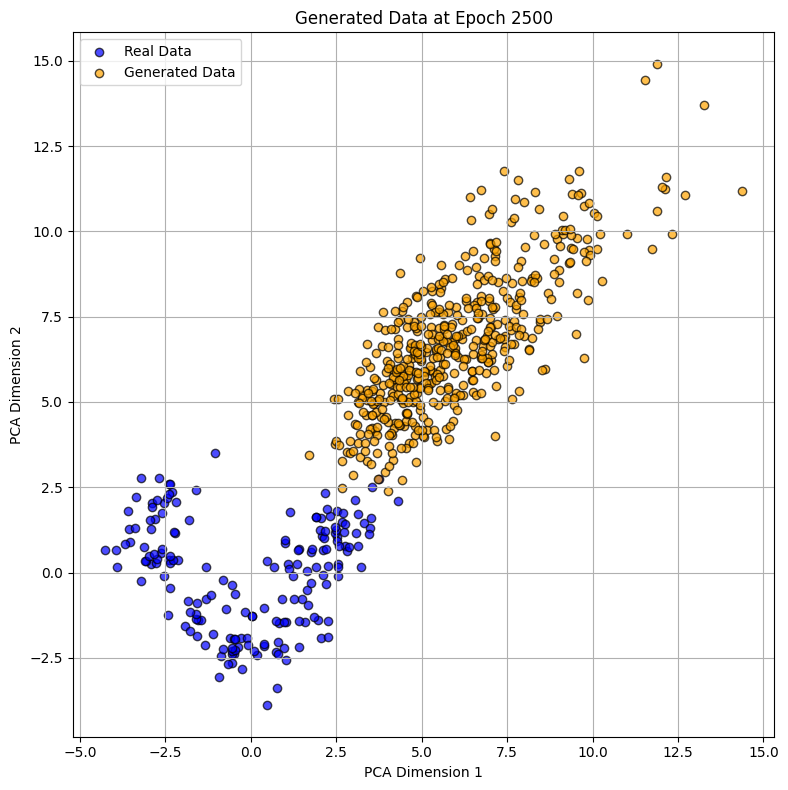

Epoch: 3000, D loss: 0.6863, G loss: 1.4286
Epoch: 3500, D loss: 0.7012, G loss: 1.4811
Epoch: 4000, D loss: 0.6422, G loss: 1.5050
Epoch: 4500, D loss: 0.6340, G loss: 1.5284
Epoch: 5000, D loss: 0.6308, G loss: 1.5541


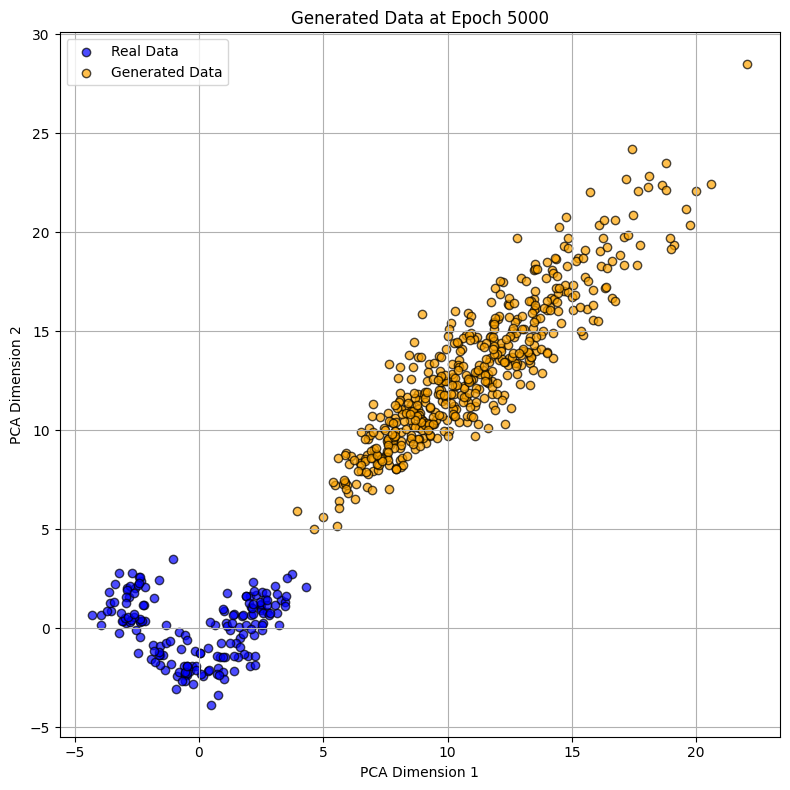

Epoch: 5500, D loss: 0.6205, G loss: 1.6068
Epoch: 6000, D loss: 0.5738, G loss: 1.6659
Epoch: 6500, D loss: 0.5802, G loss: 1.6710
Epoch: 7000, D loss: 0.5779, G loss: 1.6732
Epoch: 7500, D loss: 0.5727, G loss: 1.6831


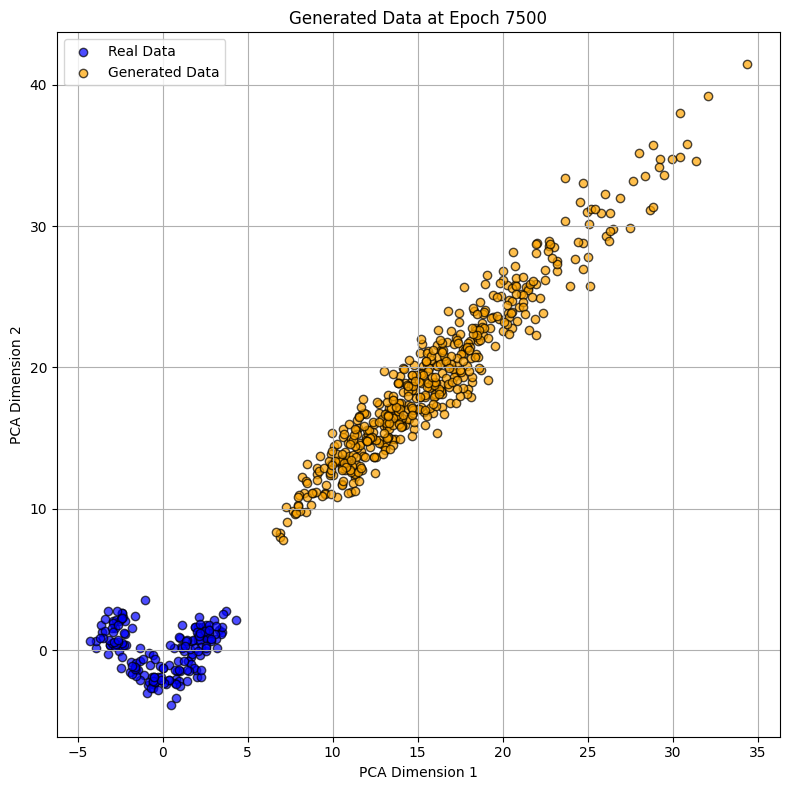

Epoch: 8000, D loss: 0.5747, G loss: 1.6944
Epoch: 8500, D loss: 0.5671, G loss: 1.7528
Epoch: 9000, D loss: 0.5787, G loss: 1.6984
Epoch: 9500, D loss: 0.5656, G loss: 1.7059
Epoch: 10000, D loss: 0.5632, G loss: 1.7190


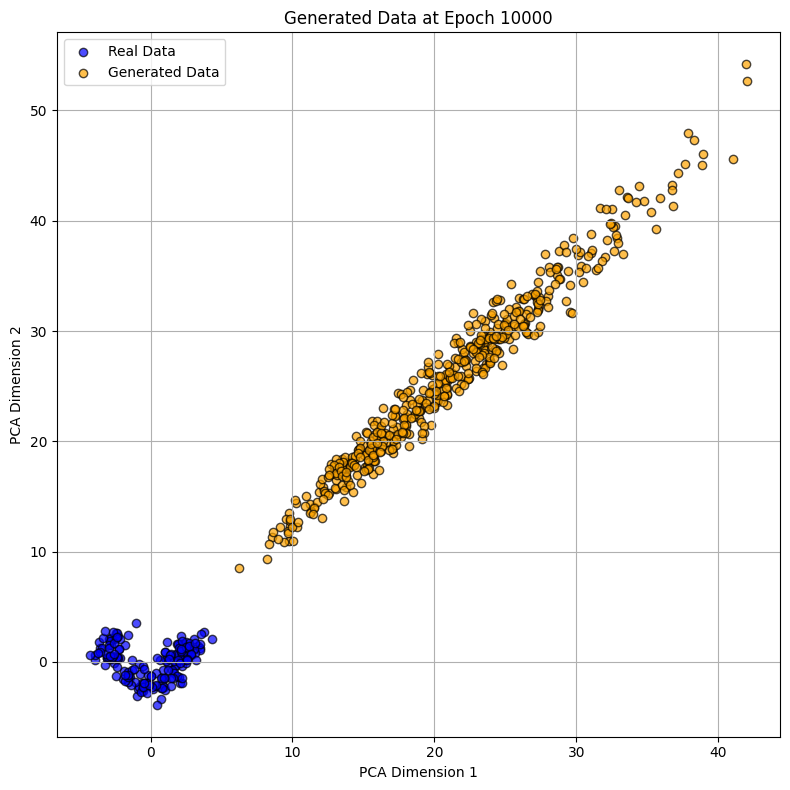

Epoch: 10500, D loss: 0.5608, G loss: 1.7085
Epoch: 11000, D loss: 0.5663, G loss: 1.7344
Epoch: 11500, D loss: 0.5667, G loss: 1.7500
Epoch: 12000, D loss: 0.5478, G loss: 1.7507
Epoch: 12500, D loss: 0.5397, G loss: 1.7767


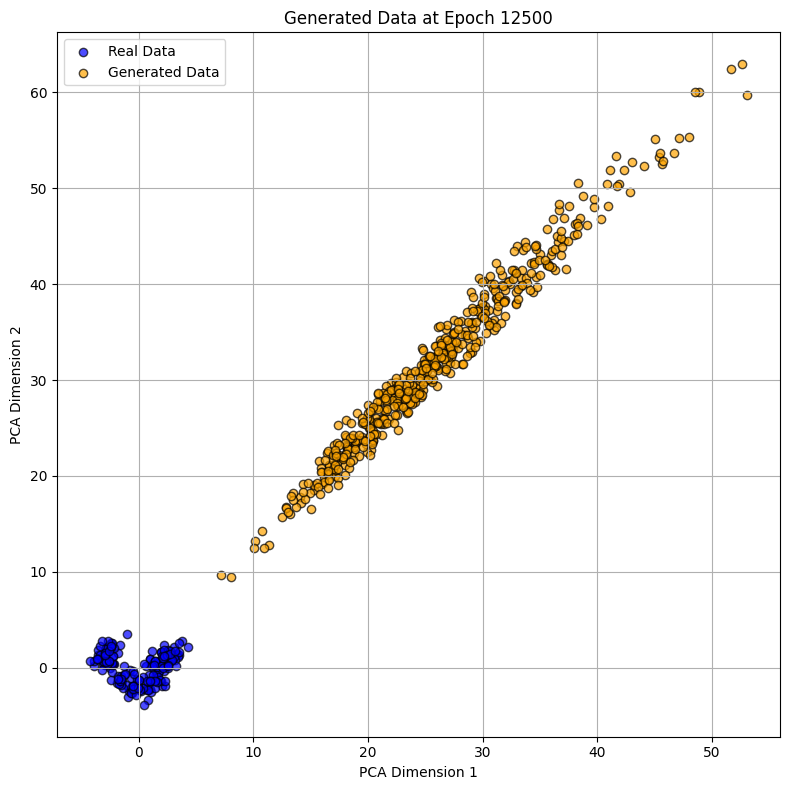

Epoch: 13000, D loss: 0.5491, G loss: 1.7597
Epoch: 13500, D loss: 0.5356, G loss: 1.7939
Epoch: 14000, D loss: 0.5328, G loss: 1.7925
Epoch: 14500, D loss: 0.5638, G loss: 1.8286
Epoch: 15000, D loss: 0.5301, G loss: 1.7902


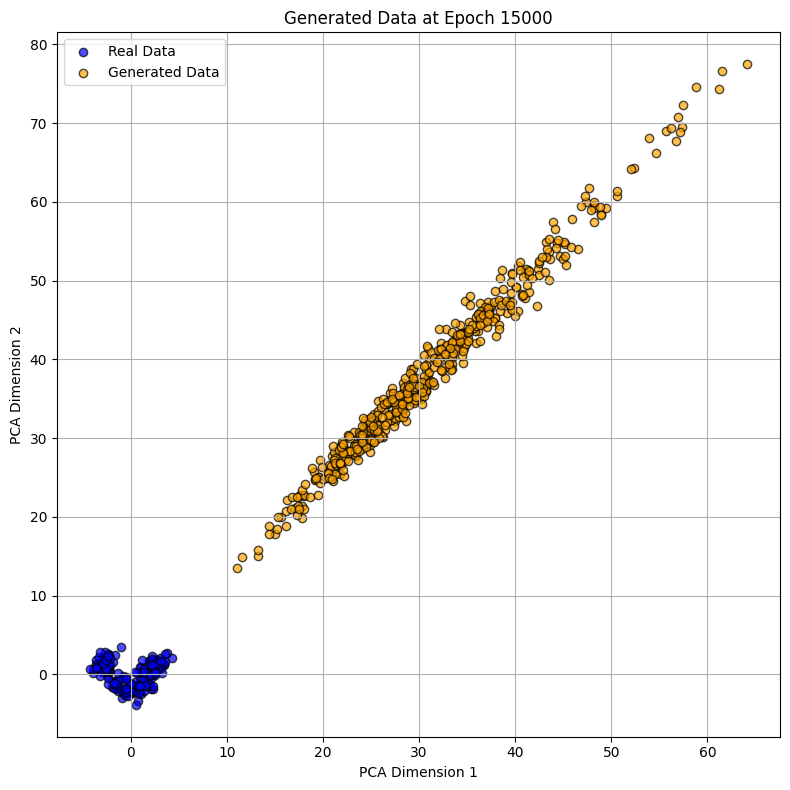

Epoch: 15500, D loss: 0.5082, G loss: 1.8159
Epoch: 16000, D loss: 0.5119, G loss: 1.7945
Epoch: 16500, D loss: 0.5327, G loss: 1.7966
Epoch: 17000, D loss: 0.5521, G loss: 1.8038
Epoch: 17500, D loss: 0.5285, G loss: 1.7995


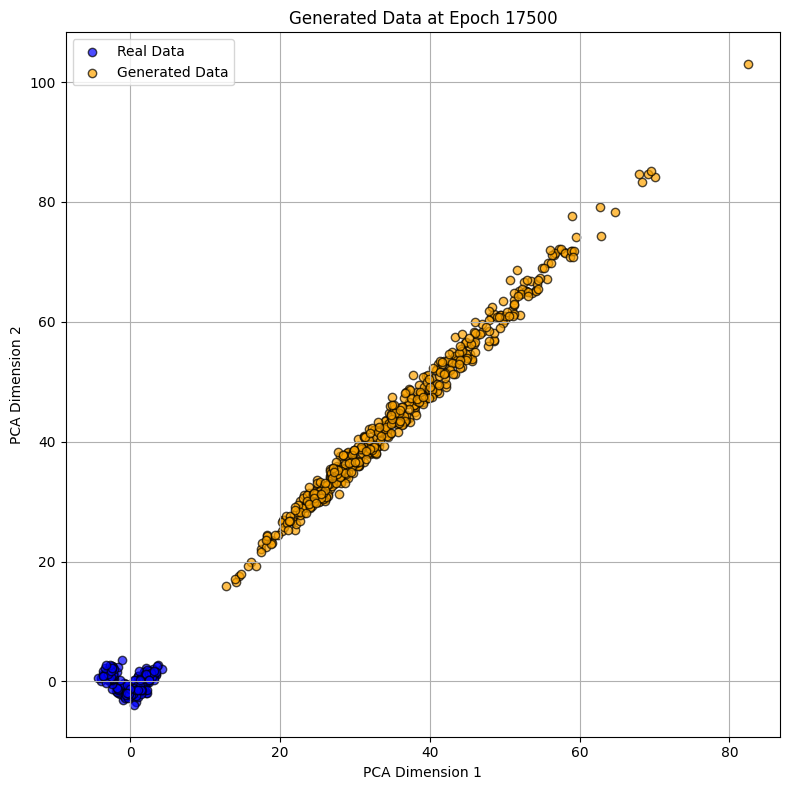

Epoch: 18000, D loss: 0.5474, G loss: 1.7829
Epoch: 18500, D loss: 0.5695, G loss: 1.7717
Epoch: 19000, D loss: 0.5346, G loss: 1.7840
Epoch: 19500, D loss: 0.5512, G loss: 1.7980


In [6]:
import numpy as np
from neural_network import ThreeLayerNN  
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine_data = load_wine()
X = wine_data.data  
scaler = StandardScaler()
X = scaler.fit_transform(X)  

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)  # Reduce dimensions w PCA

input_dim = X.shape[1]
hidden_units = 64
learning_rate = 0.001  # Adjusted learning rate
z_dim = 10
batch_size = 64
epochs = 20000

def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class Generator:
    def __init__(self, z_dim, hidden_units, data_dim, learning_rate, clip_value):
        self.z_dim = z_dim
        self.hidden_units = hidden_units
        self.data_dim = data_dim
        self.learning_rate = learning_rate
        self.clip_value = clip_value

        self.W1 = np.random.randn(z_dim, hidden_units) * np.sqrt(2.0 / z_dim)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = np.random.randn(hidden_units, data_dim) * np.sqrt(2.0 / hidden_units)
        self.b2 = np.zeros((1, data_dim))

    def relu(self, x):
        return np.maximum(0, x)
    
    # stabilize with batch norm
    def batch_norm(self, x, epsilon=1e-5):
        mean = np.mean(x, axis=0)
        var = np.var(x, axis=0)
        return (x - mean) / np.sqrt(var + epsilon)

    def forward(self, z):
        self.z_input = z
        self.z1 = np.dot(z, self.W1) + self.b1
        self.a1 = self.relu(self.batch_norm(self.z1))
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, grad_output):
        grad_output = np.clip(grad_output, -self.clip_value, self.clip_value)
        dW2 = np.dot(self.a1.T, grad_output)
        db2 = np.sum(grad_output, axis=0, keepdims=True)

        dA1 = np.dot(grad_output, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)
        dW1 = np.dot(self.z_input.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        self.W2 -= self.learning_rate * np.clip(dW2, -self.clip_value, self.clip_value)
        self.b2 -= self.learning_rate * np.clip(db2, -self.clip_value, self.clip_value)
        self.W1 -= self.learning_rate * np.clip(dW1, -self.clip_value, self.clip_value)
        self.b1 -= self.learning_rate * np.clip(db1, -self.clip_value, self.clip_value)

discriminator_learning_rate = 0.00005  # Reduced learning rate
generator_learning_rate = 0.00005  # Reduced learning rate

# discriminator and generator adjustment for load_wine
discriminator = ThreeLayerNN(
    input_dim=input_dim,
    hidden_units=hidden_units,
    output_dim=1,
    learning_rate=discriminator_learning_rate,
    clip_value=1.0
)

generator = Generator(
    z_dim=z_dim,
    hidden_units=hidden_units,
    data_dim=input_dim,
    learning_rate=generator_learning_rate,
    clip_value=1.0
)

def plot_data(generator, z_dim, epoch, num_samples=500):
    z = np.random.normal(0, 1, size=(num_samples, z_dim))
    samples = generator.forward(z)
    samples_2d = pca.transform(samples)

    plt.figure(figsize=(8, 8))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, label='Real Data', color='blue', edgecolor='k')
    plt.scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.7, label='Generated Data', color='orange', edgecolor='k')
    plt.title(f"Generated Data at Epoch {epoch}")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

d_losses, g_losses = [], []
discriminator_steps = 10  # Train discriminator fewer times per generator step

for epoch in range(epochs):
    for _ in range(discriminator_steps):

        z = np.random.normal(0, 1, size=(batch_size, z_dim))
        fake_data = generator.forward(z)
        real_data = X[np.random.randint(0, X.shape[0], batch_size)]

        y_real = np.random.uniform(0.9, 1.0, size=(batch_size, 1))
        y_fake = np.random.uniform(0.0, 0.1, size=(batch_size, 1))  

        d_real = discriminator.forward(real_data)
        d_fake = discriminator.forward(fake_data)
        discriminator.backward(real_data, y_real, d_real)
        discriminator.backward(fake_data, y_fake, d_fake)

    z = np.random.normal(0, 1, size=(batch_size, z_dim))
    fake_data = generator.forward(z)
    d_fake_for_g = discriminator.forward(fake_data)
    grad_outputs = np.clip(-1 / (d_fake_for_g + 1e-8), -1, 1)
    generator.backward(np.repeat(grad_outputs, input_dim, axis=1))

    if epoch % 500 == 0:
        d_loss = binary_cross_entropy(d_real, y_real) + binary_cross_entropy(d_fake, y_fake)
        g_loss = binary_cross_entropy(d_fake_for_g, y_real)

        d_losses.append(d_loss)
        g_losses.append(g_loss)

        print(f"Epoch: {epoch}, D loss: {d_loss:.4f}, G loss: {g_loss:.4f}")

        if epoch % 2500 == 0:
            plot_data(generator, z_dim, epoch, num_samples=500)

Epoch: 0, D Loss: 1.7852, G Loss: -1.6669


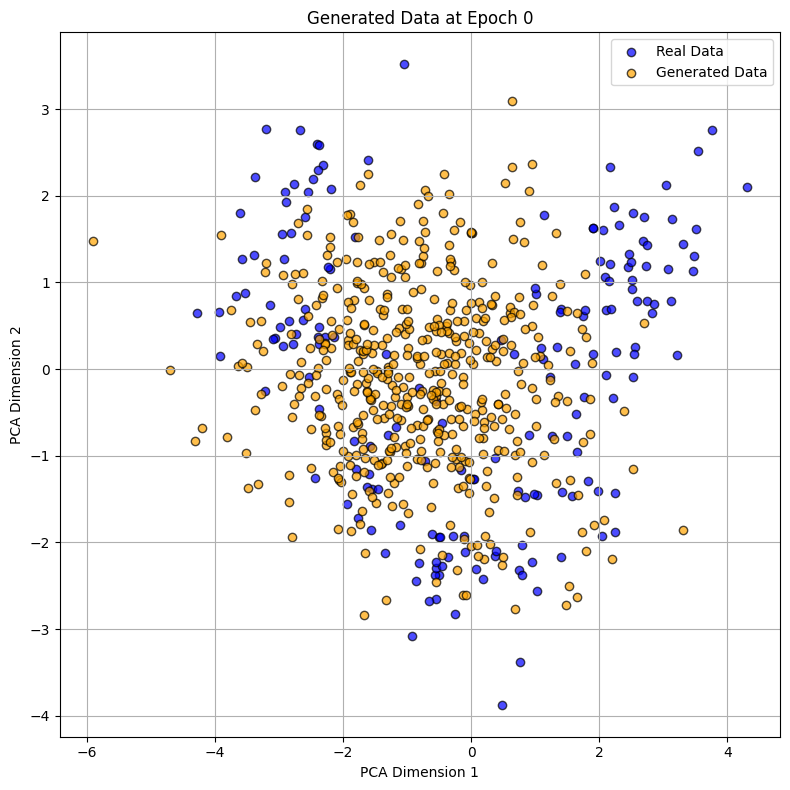

Epoch: 1000, D Loss: -0.3241, G Loss: -0.1013
Epoch: 2000, D Loss: -0.3301, G Loss: -0.3484


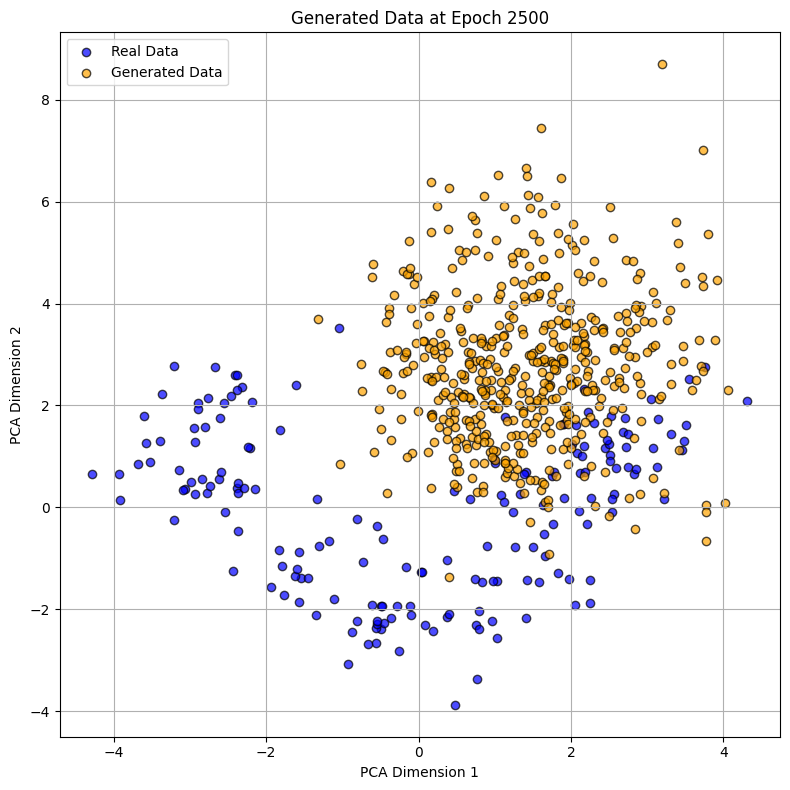

Epoch: 3000, D Loss: -0.4958, G Loss: 0.1513
Epoch: 4000, D Loss: -0.2331, G Loss: 0.0097
Epoch: 5000, D Loss: -0.2628, G Loss: -0.0948


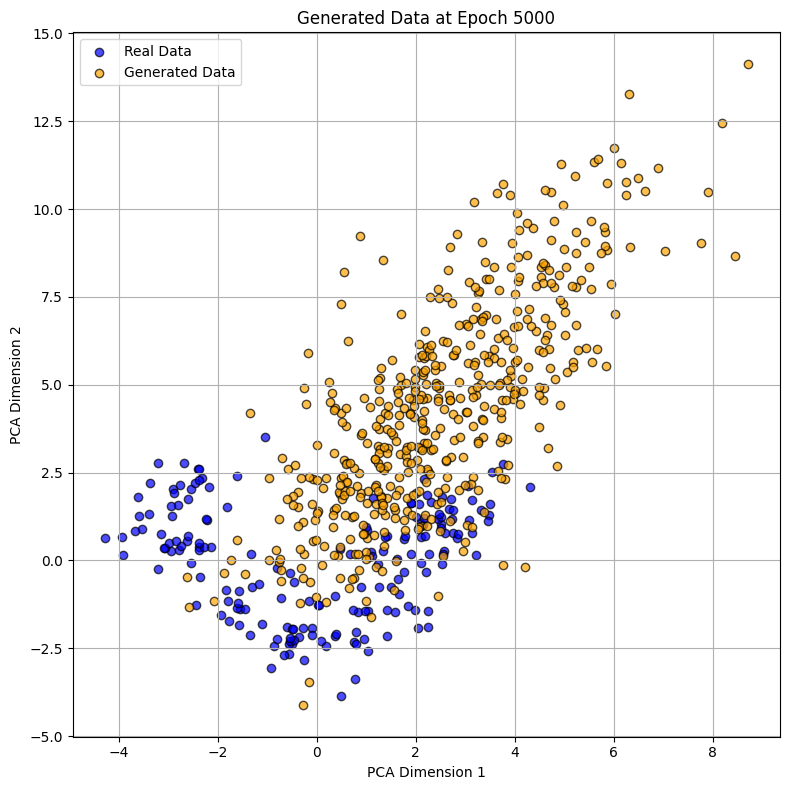

Epoch: 6000, D Loss: -0.0507, G Loss: -0.1827
Epoch: 7000, D Loss: -0.1160, G Loss: 0.0939


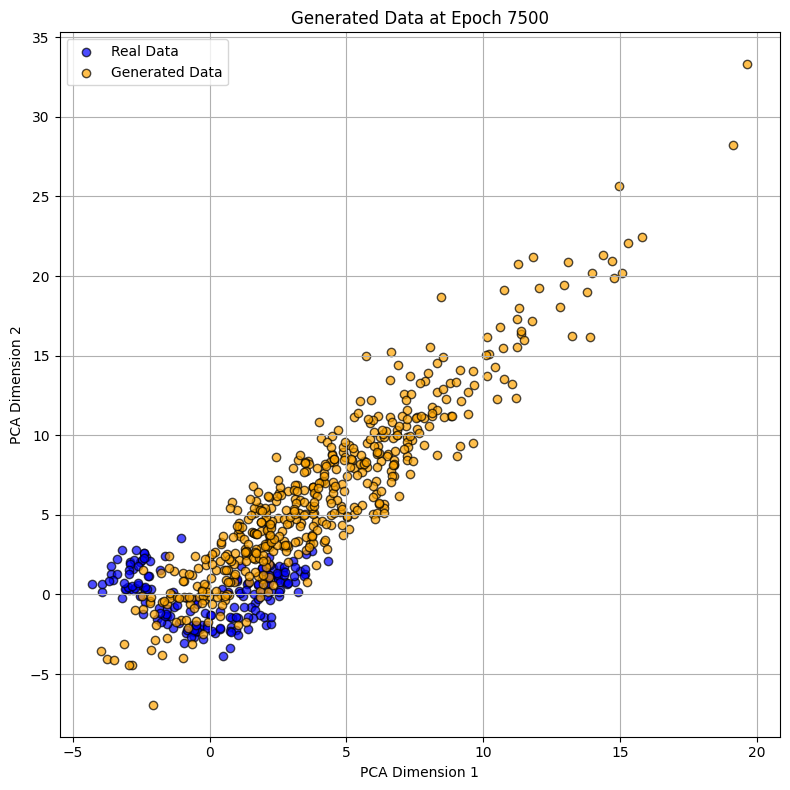

Epoch: 8000, D Loss: -0.4897, G Loss: 0.1045
Epoch: 9000, D Loss: 0.0815, G Loss: 0.0111
Epoch: 10000, D Loss: -0.1090, G Loss: -0.1757


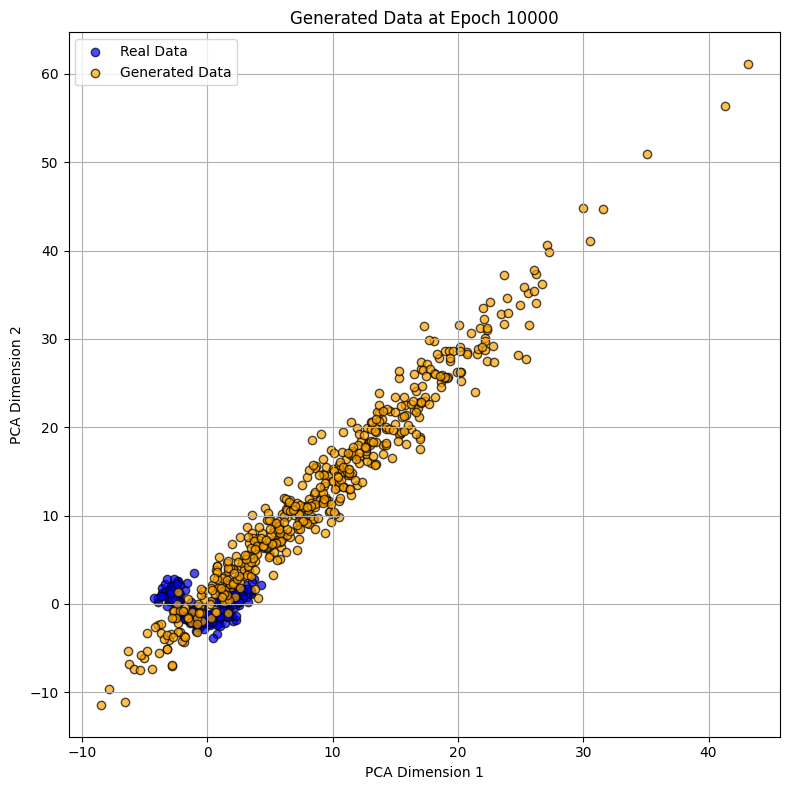

Epoch: 11000, D Loss: 0.0928, G Loss: -0.6327
Epoch: 12000, D Loss: 0.4289, G Loss: -0.6587


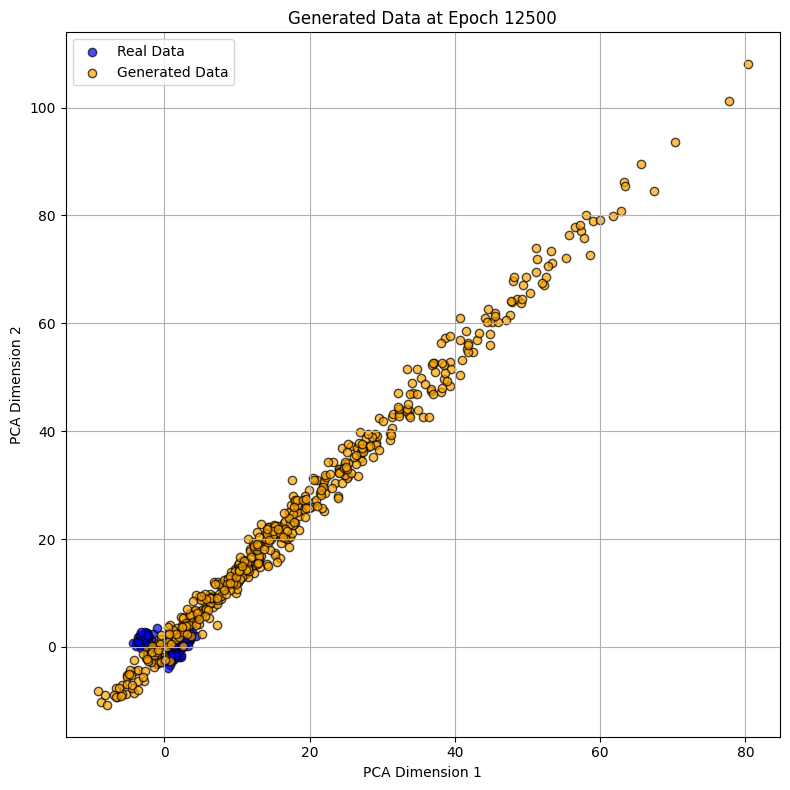

Epoch: 13000, D Loss: 2.9331, G Loss: -2.5969
Epoch: 14000, D Loss: 4.0811, G Loss: -4.4427
Epoch: 15000, D Loss: 5.8049, G Loss: -7.2568


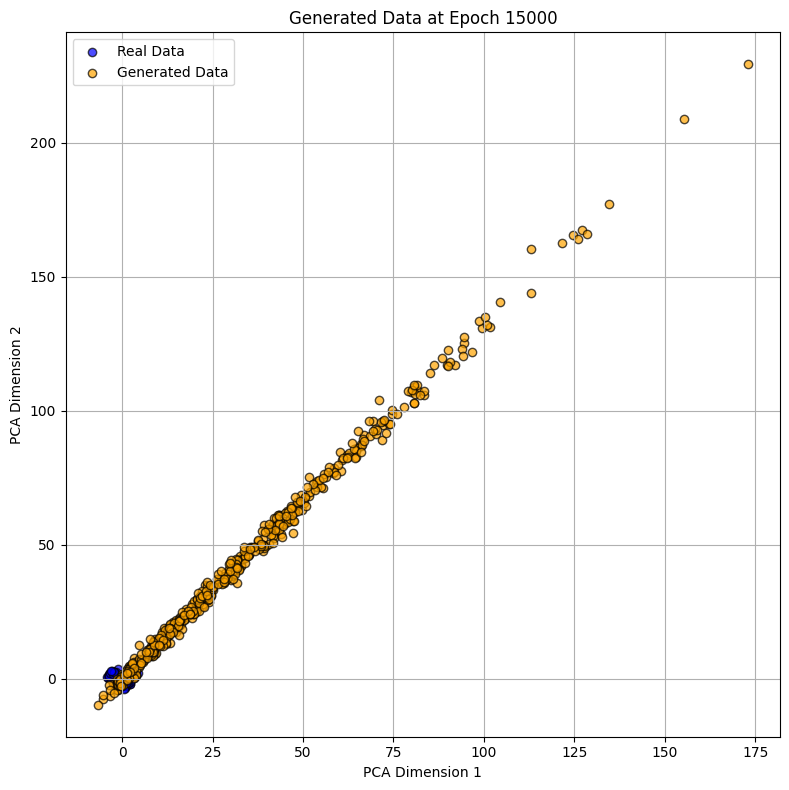

Epoch: 16000, D Loss: 12.7356, G Loss: -16.0234
Epoch: 17000, D Loss: 18.5972, G Loss: -20.5481


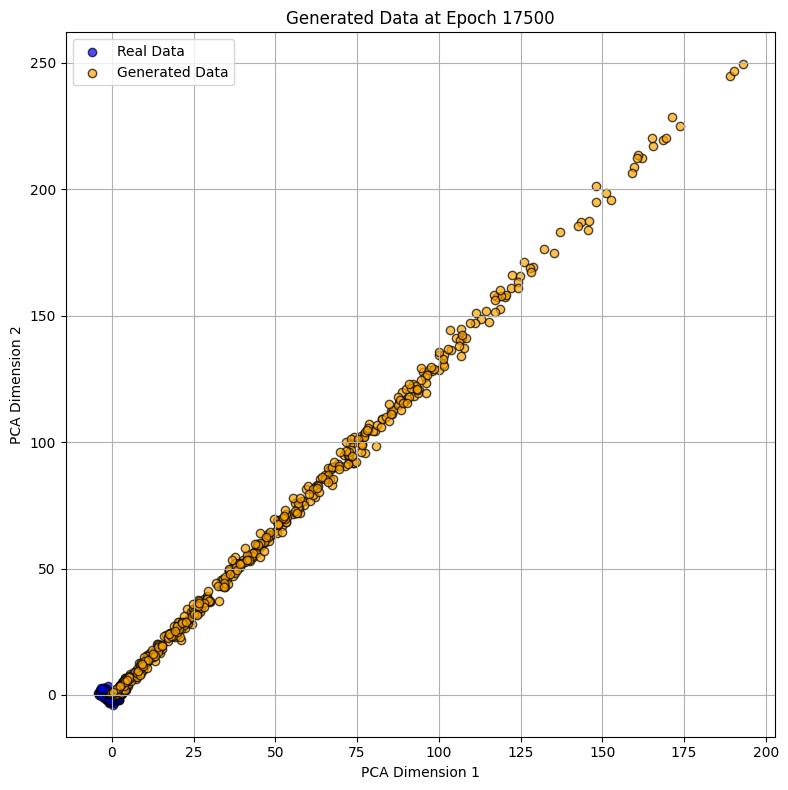

Epoch: 18000, D Loss: 26.5072, G Loss: -27.4502
Epoch: 19000, D Loss: 39.9362, G Loss: -21.1732


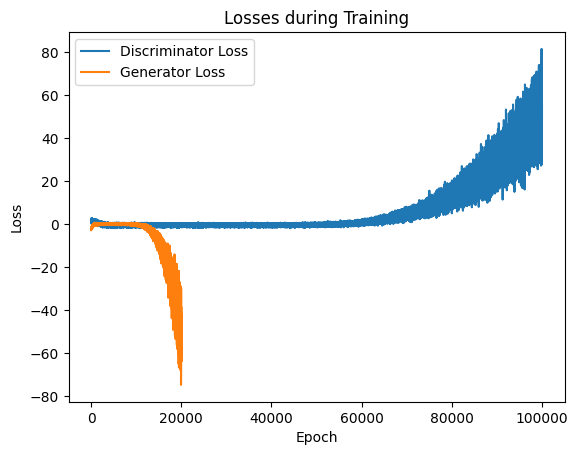

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

wine_data = load_wine()
X = wine_data.data
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

input_dim = X.shape[1]
z_dim = 100
hidden_units = 64
batch_size = 32
epochs = 20000
discriminator_steps = 5
clip_value = 0.01

def initialize_weights(input_size, output_size):
    return np.random.randn(input_size, output_size) * np.sqrt(2.0 / input_size)

def wasserstein_loss(y_pred, y_true):
    return np.mean(y_pred * y_true)

class Generator:
    def __init__(self, z_dim, hidden_units, data_dim, learning_rate=0.00005):
        self.z_dim = z_dim
        self.hidden_units = hidden_units
        self.data_dim = data_dim
        self.learning_rate = learning_rate
        self.W1 = initialize_weights(z_dim, hidden_units)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = initialize_weights(hidden_units, data_dim)
        self.b2 = np.zeros((1, data_dim))

    def relu(self, x):
        return np.maximum(0, x)
    
    def forward(self, z):
        self.z_input = z
        self.z1 = np.dot(z, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, grad_output):
        dW2 = np.dot(self.a1.T, grad_output)
        db2 = np.sum(grad_output, axis=0, keepdims=True)
        dA1 = np.dot(grad_output, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)
        dW1 = np.dot(self.z_input.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        self.W2 -= self.learning_rate * np.clip(dW2, -1, 1)
        self.b2 -= self.learning_rate * np.clip(db2, -1, 1)
        self.W1 -= self.learning_rate * np.clip(dW1, -1, 1)
        self.b1 -= self.learning_rate * np.clip(db1, -1, 1)

class Discriminator:
    def __init__(self, input_dim, hidden_units, learning_rate=0.00005, clip_value=0.01):
        self.input_dim = input_dim
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.clip_value = clip_value
        self.W1 = initialize_weights(input_dim, hidden_units)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = initialize_weights(hidden_units, 1)
        self.b2 = np.zeros((1, 1))

    def leaky_relu(self, x, alpha=0.2):
        return np.maximum(alpha * x, x)
    
    def forward(self, data):
        self.data_input = data
        self.z1 = np.dot(data, self.W1) + self.b1
        self.a1 = self.leaky_relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, data, grad_output):
        grad_output = np.clip(grad_output, -self.clip_value, self.clip_value)
        dW2 = np.dot(self.a1.T, grad_output)
        db2 = np.sum(grad_output, axis=0, keepdims=True)
        dA1 = np.dot(grad_output, self.W2.T)
        dZ1 = dA1 * (self.a1 > 0)
        dW1 = np.dot(data.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        self.W2 -= self.learning_rate * np.clip(dW2, -self.clip_value, self.clip_value)
        self.b2 -= self.learning_rate * np.clip(db2, -self.clip_value, self.clip_value)
        self.W1 -= self.learning_rate * np.clip(dW1, -self.clip_value, self.clip_value)
        self.b1 -= self.learning_rate * np.clip(db1, -self.clip_value, self.clip_value)

generator = Generator(z_dim=z_dim, hidden_units=hidden_units, data_dim=input_dim, learning_rate=0.00005)
discriminator = Discriminator(input_dim=input_dim, hidden_units=hidden_units, learning_rate=0.00005, clip_value=0.01)

d_losses, g_losses = [], []

def train_discriminator():
    for _ in range(discriminator_steps):
        z = np.random.normal(0, 1, size=(batch_size, z_dim))
        fake_data = generator.forward(z)
        real_data = X[np.random.randint(0, X.shape[0], batch_size)]
        d_real = discriminator.forward(real_data)
        d_fake = discriminator.forward(fake_data)
        d_loss = np.mean(d_fake) - np.mean(d_real)
        d_losses.append(d_loss)
        discriminator.backward(real_data, np.ones_like(d_real))
        discriminator.backward(fake_data, -np.ones_like(d_fake))

def train_generator():
    z = np.random.normal(0, 1, size=(batch_size, z_dim))
    fake_data = generator.forward(z)
    d_fake_for_g = discriminator.forward(fake_data)
    g_loss = -np.mean(d_fake_for_g)
    g_losses.append(g_loss)
    grad_outputs = np.repeat(-d_fake_for_g, input_dim, axis=1)
    generator.backward(grad_outputs)

for epoch in range(epochs):
    train_discriminator()
    train_generator()
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, D Loss: {d_losses[-1]:.4f}, G Loss: {g_losses[-1]:.4f}")
    if epoch % 2500 == 0:
        z = np.random.normal(0, 1, size=(500, z_dim))
        generated_data = generator.forward(z)
        try:
            generated_data_2d = pca.transform(generated_data)
            plt.figure(figsize=(8, 8))
            plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, label='Real Data', color='blue', edgecolor='k')
            plt.scatter(generated_data_2d[:, 0], generated_data_2d[:, 1], alpha=0.7, label='Generated Data', color='orange', edgecolor='k')
            plt.title(f"Generated Data at Epoch {epoch}")
            plt.xlabel("PCA Dimension 1")
            plt.ylabel("PCA Dimension 2")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        except ValueError as e:
            print(f"Error during PCA transformation: {e}")

plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.legend()
plt.title('Losses during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()